In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv('Datasets/person_data.csv')
df.head()

,Age,Height,Weight
0,10,138,23.0
1,11,138,22.0
2,12,138,23.5
3,13,139,24.0
4,14,139,26.0


In [4]:
df.shape

(71, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     71 non-null     int64  
 1   Height  71 non-null     int64  
 2   Weight  71 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.8 KB


In [6]:
X = df[['Age', 'Height']]
y = df['Weight']

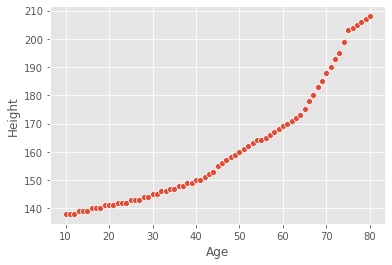

In [7]:
plt.style.use('ggplot')
sns.scatterplot(x='Age', y='Height', data=df);

In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_Scaled = sc.fit_transform(X)
print("Mean of Each Scaled Variable")
print(np.mean(X_Scaled, axis=0))
print("STD of Each Scaled Variable")
print(np.std(X_Scaled, axis=0))

Mean of Each Scaled Variable
[3.12738880e-18 2.50191104e-16]
STD of Each Scaled Variable
[1. 1.]


### PCA

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1, random_state=2020)
pca

PCA(n_components=1, random_state=2020)

In [10]:
X_pca = pca.fit_transform(X_Scaled)
print(X_pca.shape)

(71, 1)


In [11]:
print("Variance Explained by the Principal Component: ")
pca.explained_variance_ratio_ * 100

Variance Explained by the Principal Component: 


array([97.36416205])

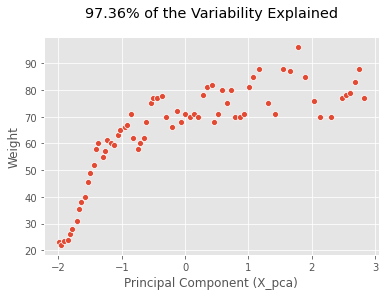

In [14]:
sns.scatterplot(x=X_pca.reshape(-1,), y = y)
plt.xlabel('Principal Component (X_pca)')
plt.ylabel('Weight')
plt.title('97.36% of the Variability Explained', pad =20);

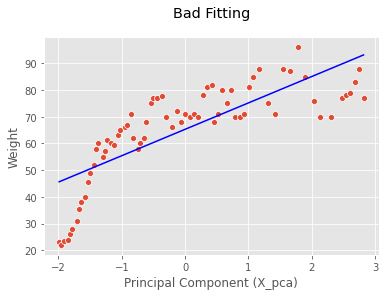

In [15]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(X_pca, y)
predictions_1 = linreg.predict(X_pca)
sns.scatterplot(x=X_pca.reshape(-1,), y = y)
plt.plot(X_pca.reshape(-1,), predictions_1, color='blue')
plt.xlabel('Principal Component (X_pca)')
plt.ylabel('Weight')
plt.title('Bad Fitting', pad=20);

In [16]:
from sklearn.metrics import r2_score, mean_squared_error

R2_1 = r2_score(y, predictions_1)
MSE_1 = mean_squared_error(y, predictions_1)
RMSE_1 = np.sqrt(MSE_1)

print('R2: ',R2_1)
print('RMSE: ',RMSE_1)

R2:  0.6115501152335727
RMSE:  10.986372729327854


In [17]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=4, include_bias=False)

X_Poly = poly_features.fit_transform(X_pca)
print(X_Poly.shape)

(71, 4)


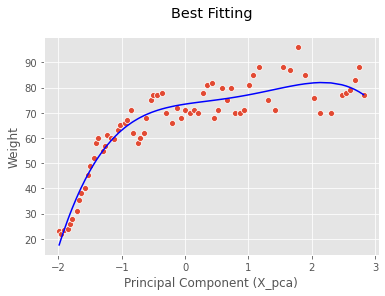

In [18]:
linreg_02 = LinearRegression()
linreg_02.fit(X_Poly, y)
predictions_2 = linreg_02.predict(X_Poly)
sns.scatterplot(x=X_pca.reshape(-1,), y = y)
plt.plot(X_pca.reshape(-1,), predictions_2, color='blue')
plt.xlabel('Principal Component (X_pca)')
plt.ylabel('Weight')
plt.title('Best Fitting', pad=20);

In [19]:
R2_2 = r2_score(y, predictions_2)
MSE_2 = mean_squared_error(y, predictions_2)
RMSE_2 = np.sqrt(MSE_2)

print('R2: ',R2_2)
print('RMSE: ',RMSE_2)

R2:  0.9017224665462797
RMSE:  5.52603911447949


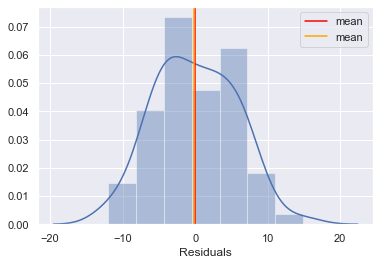

In [22]:
sns.set()
residuals = y - predictions_2
sns.distplot(residuals)
plt.axvline(x=np.mean(residuals), color='red', label='mean')
plt.axvline(x=np.median(residuals), color='orange', label='mean')
plt.xlabel('Residuals')
plt.legend(loc='best');

In [23]:
X_new = np.array([[67, 158], [23, 151], [37, 171], [51, 160], [77, 165]])

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Construct Pipeline
sc = StandardScaler()
pca = PCA(n_components=1, random_state=2020)
poly_features = PolynomialFeatures(degree=4, include_bias=False)
linreg = LinearRegression()

poly_reg_model = Pipeline([
    ('STD_SCALER', sc),
    ('PCA', pca),
    ('POLY', poly_features),
    ('Regressor', linreg)
])

poly_reg_model.fit(X,y)

Pipeline(steps=[('STD_SCALER', StandardScaler()),
                ('PCA', PCA(n_components=1, random_state=2020)),
                ('POLY', PolynomialFeatures(degree=4, include_bias=False)),
                ('Regressor', LinearRegression())])

In [27]:
poly_reg_model.predict(X_new)

array([75.67766068, 60.87213348, 73.69359015, 74.06327244, 78.34232442])